In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

# Load the datasets
train_path = '/content/DailyDelhiClimateTrain.csv'
test_path = '/content/DailyDelhiClimateTest.csv'

train_data = pd.read_csv(train_path, parse_dates=['date'], index_col='date')
test_data = pd.read_csv(test_path, parse_dates=['date'], index_col='date')

print(train_data)
print(test_data)

             meantemp    humidity  wind_speed  meanpressure
date                                                       
2013-01-01  10.000000   84.500000    0.000000   1015.666667
2013-01-02   7.400000   92.000000    2.980000   1017.800000
2013-01-03   7.166667   87.000000    4.633333   1018.666667
2013-01-04   8.666667   71.333333    1.233333   1017.166667
2013-01-05   6.000000   86.833333    3.700000   1016.500000
...               ...         ...         ...           ...
2016-12-28  17.217391   68.043478    3.547826   1015.565217
2016-12-29  15.238095   87.857143    6.000000   1016.904762
2016-12-30  14.095238   89.666667    6.266667   1017.904762
2016-12-31  15.052632   87.000000    7.325000   1016.100000
2017-01-01  10.000000  100.000000    0.000000   1016.000000

[1462 rows x 4 columns]
             meantemp   humidity  wind_speed  meanpressure
date                                                      
2017-01-01  15.913043  85.869565    2.743478     59.000000
2017-01-02  18.500

In [8]:
print(train_data.info())
print(test_data.info())

print(train_data.isnull().sum())
print(test_data.isnull().sum())

train_data.fillna(train_data.mean(), inplace=True)
test_data.fillna(test_data.mean(), inplace=True)

print(train_data.describe())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 114 entries, 2017-01-01 to 2017-04-24
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      114 non-null    float64
 1   humidity      114 non-null    float64
 2   wind_speed    114 non-null    float64
 3   meanpressure  114 non-null    float64
dtypes: float64(4)
memory usage: 4.5 KB
None
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64
meantemp        0
humidity        0
wind_speed      0
meanpre

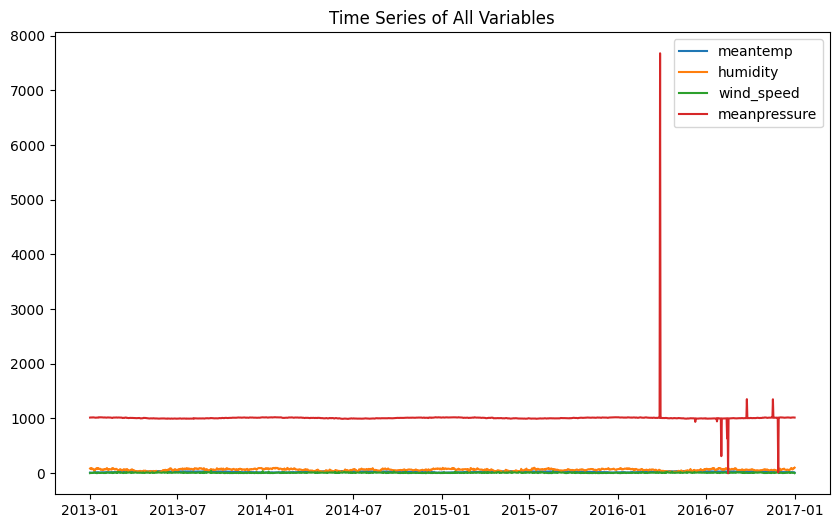

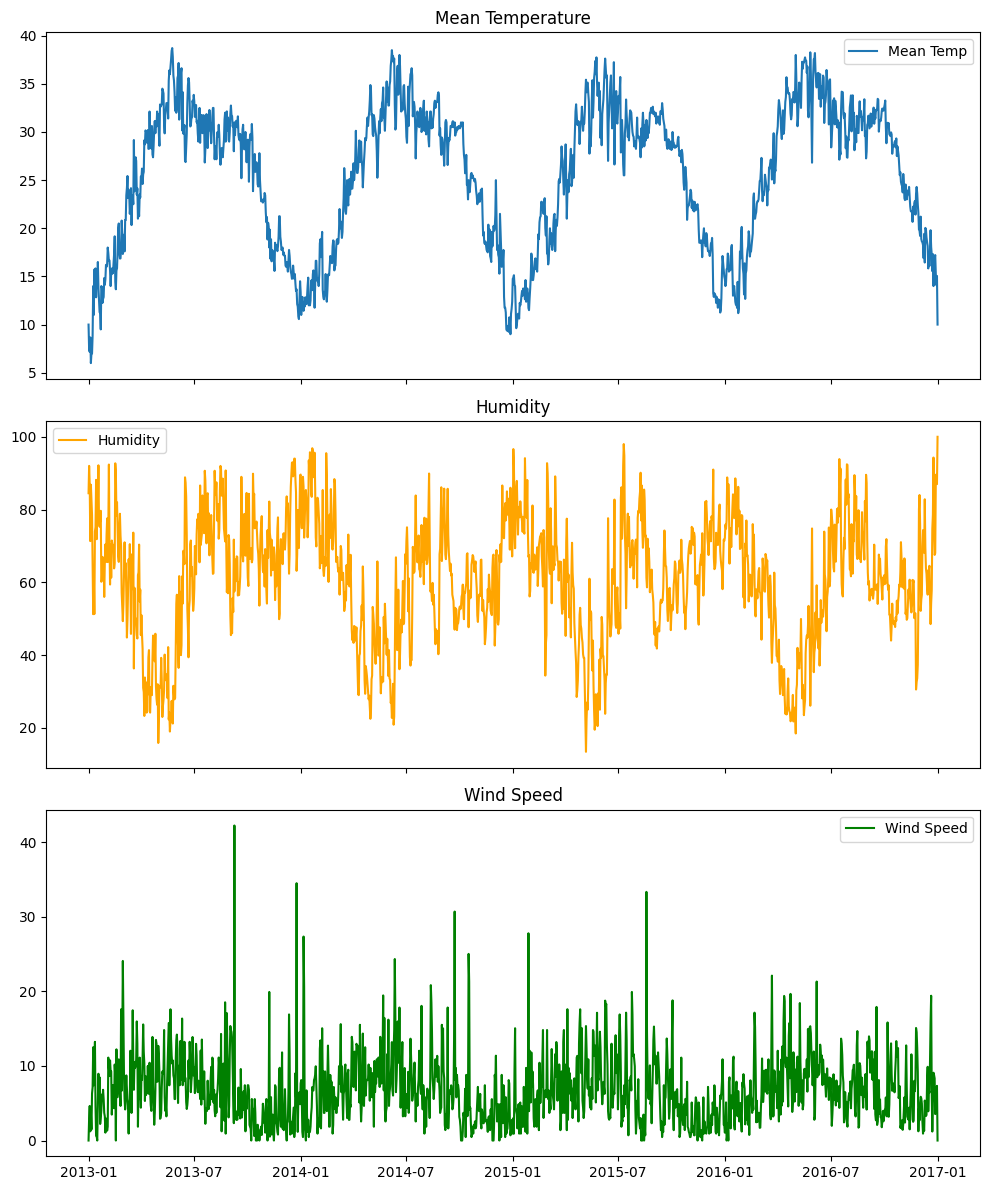

In [9]:
plt.figure(figsize=(10, 6))
for column in train_data.columns:
    plt.plot(train_data.index, train_data[column], label=column)
plt.title("Time Series of All Variables")
plt.legend()
plt.show()

fig, axs = plt.subplots(3, 1, figsize=(10, 12), sharex=True)
axs[0].plot(train_data.index, train_data['meantemp'], label='Mean Temp')
axs[1].plot(train_data.index, train_data['humidity'], label='Humidity', color='orange')
axs[2].plot(train_data.index, train_data['wind_speed'], label='Wind Speed', color='green')
axs[0].set_title("Mean Temperature")
axs[1].set_title("Humidity")
axs[2].set_title("Wind Speed")
for ax in axs:
    ax.legend()
plt.tight_layout()
plt.show()


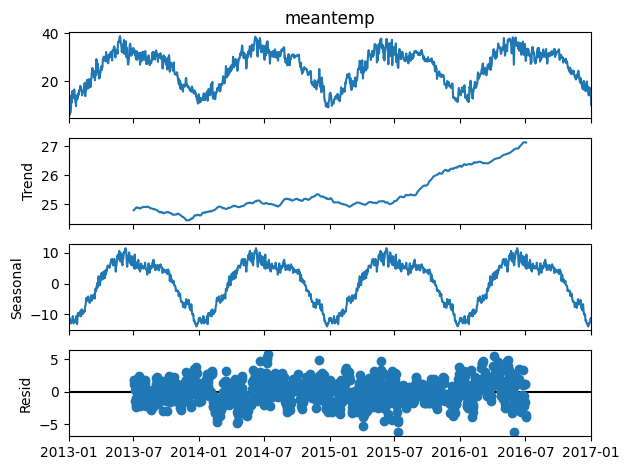

date
2013-01-01   -11.112191
2013-01-02   -12.097390
2013-01-03   -11.386488
2013-01-04   -11.134559
2013-01-05   -11.317170
Name: seasonal, dtype: float64


In [10]:
result = seasonal_decompose(train_data['meantemp'], model='additive', period=365)
result.plot()
plt.show()

print(result.seasonal.head())


In [11]:
y = train_data['meantemp']
train_size = int(len(y) * 0.8)
train_set, test_set = y[:train_size], y[train_size:]

stl_result = seasonal_decompose(train_set, model='additive', period=365)
trend = stl_result.trend.dropna()

forecast = trend[-len(test_set):]

mae = mean_absolute_error(test_set, forecast)
rmse = sqrt(mean_squared_error(test_set, forecast))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Absolute Error (MAE): 6.35
Root Mean Squared Error (RMSE): 7.08
